<font size="5">Imports</font>

In [598]:
import pandas as pd

import plotly.express as px
from plotly import offline

import pycountry
import pycountry_convert

<font size="5">Bring in fighter_details DataFrame, obtained from ufc_fighters_details.py file.</font>

In [512]:
df_individual = pd.read_excel('fighter_details.xlsx')
df_individual.head(5)

,Unnamed: 0,Name,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH
0,0,Guido Cannetti,ACTIVE,"SAN ANTONIO DE PADUA, ARGENTINA",TUAN MMA,STRIKER,42.0,66.0,136.0,"NOV. 15, 2014",68.0,38.5
1,1,Silvana Juarez,ACTIVE,"SAN MIGUEL DE TUCUMAN, ARGENTINA",ENTRAM GYM,STRIKER,37.0,64.0,115.5,"OCT. 09, 2021",64.0,37.0
2,2,Armen Petrosyan,ACTIVE,"KRASNOYARSK, RUSSIA",NaN,MUAY THAI,31.0,75.0,194.0,"FEB. 26, 2022",71.0,42.0
3,3,Jessica-Rose Clark,ACTIVE,AUSTRALIA,CSA GYM,FREESTYLE,34.0,65.0,135.5,"NOV. 18, 2017",64.5,39.0
4,4,Jimmy Crute,ACTIVE,"SINGLETON, AUSTRALIA",THE RESISTANCE TRAINING CENTER,MMA,26.0,74.0,205.5,"DEC. 02, 2018",74.0,43.0


<font size="4">Clean up df_individual for merging on fighter name.</font>

In [513]:
df_individual.drop(columns=['Unnamed: 0'], inplace=True)
df_individual.rename(columns={'Name': 'FighterName'}, inplace=True)
print(df_individual.shape)
df_individual.head(5)

(686, 11)


,FighterName,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH
0,Guido Cannetti,ACTIVE,"SAN ANTONIO DE PADUA, ARGENTINA",TUAN MMA,STRIKER,42.0,66.0,136.0,"NOV. 15, 2014",68.0,38.5
1,Silvana Juarez,ACTIVE,"SAN MIGUEL DE TUCUMAN, ARGENTINA",ENTRAM GYM,STRIKER,37.0,64.0,115.5,"OCT. 09, 2021",64.0,37.0
2,Armen Petrosyan,ACTIVE,"KRASNOYARSK, RUSSIA",NaN,MUAY THAI,31.0,75.0,194.0,"FEB. 26, 2022",71.0,42.0
3,Jessica-Rose Clark,ACTIVE,AUSTRALIA,CSA GYM,FREESTYLE,34.0,65.0,135.5,"NOV. 18, 2017",64.5,39.0
4,Jimmy Crute,ACTIVE,"SINGLETON, AUSTRALIA",THE RESISTANCE TRAINING CENTER,MMA,26.0,74.0,205.5,"DEC. 02, 2018",74.0,43.0


In [514]:
df_individual['FighterName'] = df_individual['FighterName'].str.upper()

In [515]:
print(df_individual.shape)
df_individual.head(5)

(686, 11)


,FighterName,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH
0,GUIDO CANNETTI,ACTIVE,"SAN ANTONIO DE PADUA, ARGENTINA",TUAN MMA,STRIKER,42.0,66.0,136.0,"NOV. 15, 2014",68.0,38.5
1,SILVANA JUAREZ,ACTIVE,"SAN MIGUEL DE TUCUMAN, ARGENTINA",ENTRAM GYM,STRIKER,37.0,64.0,115.5,"OCT. 09, 2021",64.0,37.0
2,ARMEN PETROSYAN,ACTIVE,"KRASNOYARSK, RUSSIA",NaN,MUAY THAI,31.0,75.0,194.0,"FEB. 26, 2022",71.0,42.0
3,JESSICA-ROSE CLARK,ACTIVE,AUSTRALIA,CSA GYM,FREESTYLE,34.0,65.0,135.5,"NOV. 18, 2017",64.5,39.0
4,JIMMY CRUTE,ACTIVE,"SINGLETON, AUSTRALIA",THE RESISTANCE TRAINING CENTER,MMA,26.0,74.0,205.5,"DEC. 02, 2018",74.0,43.0


<font size="5">Bring in active fighters country DataFrame, obtained from ufc_stats_4.6 file.</font>

In [516]:
df_fighters_country = pd.read_excel('active_fighters_by_country.xlsx',
                                   usecols=['FighterName', 'Country', 'Wins', 'Losses', 'Draws']
                                   )
df_fighters_country.head(5)

,FighterName,Country,Wins,Losses,Draws
0,GUIDO CANNETTI,Argentina,9,7,0
1,SILVANA JUAREZ,Argentina,6,4,0
2,ARMEN PETROSYAN,Armenia,7,1,0
3,JESSICA-ROSE CLARK,Australia,11,7,0
4,JIMMY CRUTE,Australia,12,3,0


<font size="5">Merge the fighters country and fighters details DataFrames on FighterName.</font>

In [517]:
print(df_individual.shape)
print(df_fighters_country.shape)

(686, 11)
(686, 5)


In [518]:
df_merge = pd.merge(df_individual, df_fighters_country, on=['FighterName'], how='inner')

In [519]:
df_merge.head(5)

,FighterName,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH,Country,Wins,Losses,Draws
0,GUIDO CANNETTI,ACTIVE,"SAN ANTONIO DE PADUA, ARGENTINA",TUAN MMA,STRIKER,42.0,66.0,136.0,"NOV. 15, 2014",68.0,38.5,Argentina,9,7,0
1,SILVANA JUAREZ,ACTIVE,"SAN MIGUEL DE TUCUMAN, ARGENTINA",ENTRAM GYM,STRIKER,37.0,64.0,115.5,"OCT. 09, 2021",64.0,37.0,Argentina,6,4,0
2,ARMEN PETROSYAN,ACTIVE,"KRASNOYARSK, RUSSIA",NaN,MUAY THAI,31.0,75.0,194.0,"FEB. 26, 2022",71.0,42.0,Armenia,7,1,0
3,JESSICA-ROSE CLARK,ACTIVE,AUSTRALIA,CSA GYM,FREESTYLE,34.0,65.0,135.5,"NOV. 18, 2017",64.5,39.0,Australia,11,7,0
4,JIMMY CRUTE,ACTIVE,"SINGLETON, AUSTRALIA",THE RESISTANCE TRAINING CENTER,MMA,26.0,74.0,205.5,"DEC. 02, 2018",74.0,43.0,Australia,12,3,0


In [520]:
print(df_merge.shape)

(682, 15)


In [521]:
# Not all HOMETOWN values have only one comma.
df_merge.query('FighterName == "CIRYL GANE"')

,FighterName,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH,Country,Wins,Losses,Draws
134,CIRYL GANE,ACTIVE,"LA ROCHE-SUR-YON, VENDÉE, FRANCE","MMA FACTORY - PARIS, FRANCE",MUAY THAI,31.0,76.0,247.0,"AUG. 10, 2019",81.0,42.0,France,10,1,0


In [522]:
df_merge['HOMETOWN'].fillna('NULL', inplace=True)
df_merge[['City', 'Country_Hometown']] = df_merge['HOMETOWN'].str.split(",", expand=True, n=1).copy()
df_merge.head(10)

,FighterName,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH,Country,Wins,Losses,Draws,City,Country_Hometown
0,GUIDO CANNETTI,ACTIVE,"SAN ANTONIO DE PADUA, ARGENTINA",TUAN MMA,STRIKER,42.0,66.0,136.0,"NOV. 15, 2014",68.0,38.5,Argentina,9,7,0,SAN ANTONIO DE PADUA,ARGENTINA
1,SILVANA JUAREZ,ACTIVE,"SAN MIGUEL DE TUCUMAN, ARGENTINA",ENTRAM GYM,STRIKER,37.0,64.0,115.5,"OCT. 09, 2021",64.0,37.0,Argentina,6,4,0,SAN MIGUEL DE TUCUMAN,ARGENTINA
2,ARMEN PETROSYAN,ACTIVE,"KRASNOYARSK, RUSSIA",NaN,MUAY THAI,31.0,75.0,194.0,"FEB. 26, 2022",71.0,42.0,Armenia,7,1,0,KRASNOYARSK,RUSSIA
3,JESSICA-ROSE CLARK,ACTIVE,AUSTRALIA,CSA GYM,FREESTYLE,34.0,65.0,135.5,"NOV. 18, 2017",64.5,39.0,Australia,11,7,0,AUSTRALIA,None
4,JIMMY CRUTE,ACTIVE,"SINGLETON, AUSTRALIA",THE RESISTANCE TRAINING CENTER,MMA,26.0,74.0,205.5,"DEC. 02, 2018",74.0,43.0,Australia,12,3,0,SINGLETON,AUSTRALIA
5,JOSH CULIBAO,ACTIVE,"SYDNEY, AUSTRALIA",IGOR MMA,FREESTYLE,27.0,70.0,146.0,"FEB. 23, 2020",73.0,39.0,Australia,9,1,1,SYDNEY,AUSTRALIA
6,JACK DELLA MADDALENA,ACTIVE,AUSTRALIA,NaN,MMA,25.0,71.0,170.5,"JAN. 22, 2022",73.0,40.5,Australia,11,2,0,AUSTRALIA,None
7,JACOB MALKOUN,ACTIVE,"SYDNEY, AUSTRALIA",NaN,MMA,26.0,69.0,186.0,"OCT. 24, 2020",73.0,38.0,Australia,6,1,0,SYDNEY,AUSTRALIA
8,JAKE MATTHEWS,ACTIVE,"PRESTON, AUSTRALIA","XLR8 TRANING CENTRE, EPPING, VICTORIA, AUSTRALIA",FREESTYLE,27.0,71.5,170.0,"JUN. 28, 2014",73.0,43.0,Australia,17,5,0,PRESTON,AUSTRALIA
9,JAMIE MULLARKEY,ACTIVE,"CENTRAL COAST, AUSTRALIA",CENTRAL COAST MMA,FREESTYLE,27.0,72.0,155.5,"OCT. 05, 2019",74.0,39.0,Australia,14,5,0,CENTRAL COAST,AUSTRALIA


In [523]:
df_merge.query('FighterName == "CIRYL GANE"')

,FighterName,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH,Country,Wins,Losses,Draws,City,Country_Hometown
134,CIRYL GANE,ACTIVE,"LA ROCHE-SUR-YON, VENDÉE, FRANCE","MMA FACTORY - PARIS, FRANCE",MUAY THAI,31.0,76.0,247.0,"AUG. 10, 2019",81.0,42.0,France,10,1,0,LA ROCHE-SUR-YON,"VENDÉE, FRANCE"


In [524]:
print(df_merge.shape)

(682, 17)


<font size="5">Obtain Alpha_3 Country code column.</font>

In [576]:
country_alpha_3 = {country: None for country in list(df_merge['Country'])}
for country in list(df_merge['Country']):
    alpha_3 = pycountry_convert.country_name_to_country_alpha3(country)
    country_alpha_3[country] = alpha_3

# print(country_alpha_3)
# print(list(country_alpha_3.values()))
df_country_code_table = pd.DataFrame(data={'Country': list(country_alpha_3.keys()), 'Alpha_3_Code': list(country_alpha_3.values())})
# print(country_alpha_3)
df_country_code_table.head(10)

,Country,Alpha_3_Code
0,Argentina,ARG
1,Armenia,ARM
2,Australia,AUS
3,Austria,AUT
4,Brazil,BRA
5,Bulgaria,BGR
6,Canada,CAN
7,China,CHN
8,Czechia,CZE
9,Denmark,DNK


In [577]:
df_merge = pd.merge(df_merge, df_country_code_table, on=['Country'], how='inner')
print(df_merge.shape)

(682, 18)


In [578]:
df_merge.head(10)

,FighterName,STATUS,HOMETOWN,TRAINS AT,FIGHTING STYLE,AGE,HEIGHT,WEIGHT,OCTAGON DEBUT,REACH,LEG REACH,Country,Wins,Losses,Draws,City,Country_Hometown,Alpha_3_Code
0,GUIDO CANNETTI,ACTIVE,"SAN ANTONIO DE PADUA, ARGENTINA",TUAN MMA,STRIKER,42.0,66.0,136.0,"NOV. 15, 2014",68.0,38.5,Argentina,9,7,0,SAN ANTONIO DE PADUA,ARGENTINA,ARG
1,SILVANA JUAREZ,ACTIVE,"SAN MIGUEL DE TUCUMAN, ARGENTINA",ENTRAM GYM,STRIKER,37.0,64.0,115.5,"OCT. 09, 2021",64.0,37.0,Argentina,6,4,0,SAN MIGUEL DE TUCUMAN,ARGENTINA,ARG
2,ARMEN PETROSYAN,ACTIVE,"KRASNOYARSK, RUSSIA",NaN,MUAY THAI,31.0,75.0,194.0,"FEB. 26, 2022",71.0,42.0,Armenia,7,1,0,KRASNOYARSK,RUSSIA,ARM
3,JESSICA-ROSE CLARK,ACTIVE,AUSTRALIA,CSA GYM,FREESTYLE,34.0,65.0,135.5,"NOV. 18, 2017",64.5,39.0,Australia,11,7,0,AUSTRALIA,None,AUS
4,JIMMY CRUTE,ACTIVE,"SINGLETON, AUSTRALIA",THE RESISTANCE TRAINING CENTER,MMA,26.0,74.0,205.5,"DEC. 02, 2018",74.0,43.0,Australia,12,3,0,SINGLETON,AUSTRALIA,AUS
5,JOSH CULIBAO,ACTIVE,"SYDNEY, AUSTRALIA",IGOR MMA,FREESTYLE,27.0,70.0,146.0,"FEB. 23, 2020",73.0,39.0,Australia,9,1,1,SYDNEY,AUSTRALIA,AUS
6,JACK DELLA MADDALENA,ACTIVE,AUSTRALIA,NaN,MMA,25.0,71.0,170.5,"JAN. 22, 2022",73.0,40.5,Australia,11,2,0,AUSTRALIA,None,AUS
7,JACOB MALKOUN,ACTIVE,"SYDNEY, AUSTRALIA",NaN,MMA,26.0,69.0,186.0,"OCT. 24, 2020",73.0,38.0,Australia,6,1,0,SYDNEY,AUSTRALIA,AUS
8,JAKE MATTHEWS,ACTIVE,"PRESTON, AUSTRALIA","XLR8 TRANING CENTRE, EPPING, VICTORIA, AUSTRALIA",FREESTYLE,27.0,71.5,170.0,"JUN. 28, 2014",73.0,43.0,Australia,17,5,0,PRESTON,AUSTRALIA,AUS
9,JAMIE MULLARKEY,ACTIVE,"CENTRAL COAST, AUSTRALIA",CENTRAL COAST MMA,FREESTYLE,27.0,72.0,155.5,"OCT. 05, 2019",74.0,39.0,Australia,14,5,0,CENTRAL COAST,AUSTRALIA,AUS


In [579]:
# Website with a 3 letter country codes table.
# country_table_list = pd.read_html('https://laendercode.net/en/3-letter-list.html')
# country_table = country_table_list[0]
# country_table.head(10)

,ISO 3166 ALPHA-3,Country
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa
5,AND,Andorra
6,AGO,Angola
7,AIA,Anguilla
8,ATA,Antarctica
9,ATG,Antigua and Barbuda


In [525]:
with pd.ExcelWriter('df_merge.xlsx') as writer:
    df_merge.to_excel(writer, sheet_name='merged', index=False)

In [593]:
df_merge_group_country = df_merge.groupby(by=['Country', 'Alpha_3_Code'], as_index=False).sum()
print(type(df_merge_group_country))
df_merge_group_country.head(10)

<class 'pandas.core.frame.DataFrame'>


,Country,Alpha_3_Code,AGE,HEIGHT,WEIGHT,REACH,LEG REACH,Wins,Losses,Draws
0,Argentina,ARG,79.0,130.0,251.5,132.0,75.5,15,11,0
1,Armenia,ARM,31.0,75.0,194.0,71.0,42.0,7,1,0
2,Australia,AUS,367.0,917.5,2375.5,946.5,520.5,164,40,1
3,Austria,AUT,30.0,76.0,206.0,78.0,46.0,14,2,0
4,Brazil,BRA,2376.0,5160.0,11366.4,4752.0,2658.0,1062,301,19
5,Bulgaria,BGR,35.0,71.0,255.5,73.0,42.0,18,4,0
6,Canada,CAN,574.0,1240.5,27985.5,1250.0,707.5,226,83,4
7,China,CHN,336.0,811.0,1661.0,815.5,419.0,227,71,2
8,Czechia,CZE,58.0,140.0,342.0,148.5,82.0,48,7,1
9,Denmark,DNK,109.0,207.0,480.5,216.5,122.0,42,9,1


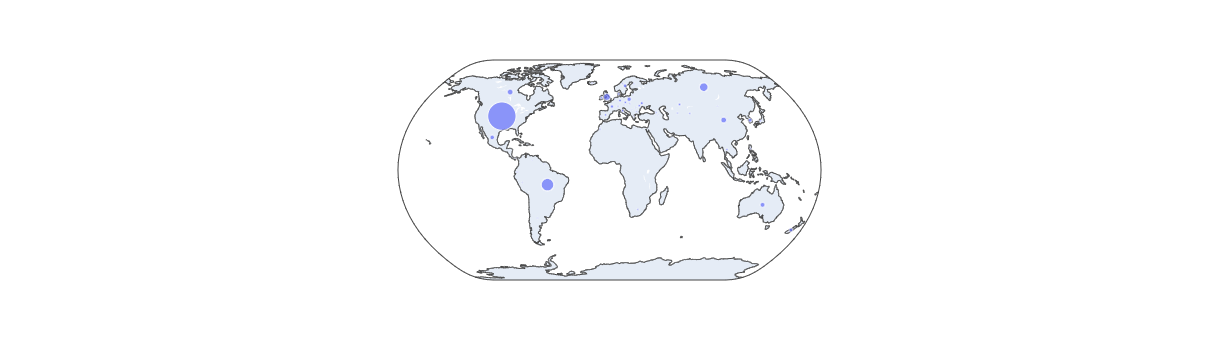

In [600]:
fig = px.scatter_geo(df_merge_group_country,
                     locations='Alpha_3_Code',
                     size='Wins',
                     projection='natural earth'
                    )
fig.show()

In [601]:
offline.plot(fig, 'scattergeo_wins.html')

'temp-plot.html'